# 1. 회귀분석(Regression)

### 개념
1. 수치형 설명변수 X와 연속형 타겟변수 Y 사이의 관계를 선형으로 가정
2. 관계를 가장 잘 표현할 수 있는 회귀계수를 추정하는 모델
3. 결과적으로 관계를 가장 잘 나타내는 직선을 찾는 것이 회귀분석의 목표


### 종류
1. 단순회귀분석: 한 개의 독립변수로 타겟변수의 값을 예측
2. 다중회귀분석: 타겟변수의 값을 예측하기 위해 여러 개의 독립변수를 함께 사용


### 회귀분석의 기본가정
1. 선형성: 예측하고자 하는 타겟변수 y와 독립변수 x 간에 선형성을 만족하는 특성
2. 정규성: 잔차가 정규성을 만족하는 특성
3. 등분산성: 잔차가 특정한 패턴 없이 고르게 분포하는 특성
4. 독립성: 독립변수 x 간에 독립성을 만족하는 특성 (다중공선성)


### 모형의 장점
1. 해석이 용이하고 추론이 쉬움
2. 상관분석 결과에 의해 정당성을 확보할 수 있음


### 모형의 단점
1. 실제로 선형이 아닌 경우 예측력이 떨어짐
2. 이상치에 민감함
3. 선형성, 정규성, 등분산성, 독립성 등 만족해야 하는 가정이 존재함

### 모형의 구조
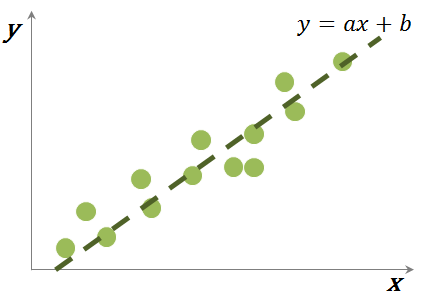

#### 위 그림은 단순선형회귀에 대한 그림

1) 점선은 회귀직선을 의미함 (각 x에 대한 y의 예측 값은 직선 위에 존재함)  
2) 점은 실제 값들을 의미함  
3) 점과 점선 사이의 거리가 가까울수록 좋은 모델

# 2. 다중공선성

### 다중공선성이란

 1) '두 개 이상'이라는 'Multi-'와 '공선성'이라는 'Colinearity'가 합쳐진 단어    
 2) 독립변수가 다른 독립변수와 상관 정도가 높아 데이터 분석 시 부정적인 영향을 미치는 현상  
 3) 따라서 단순회귀분석에서는 다중공선성 문제가 없음 (독립변수가 1개이기 때문)
 

### 다중공선성 원리
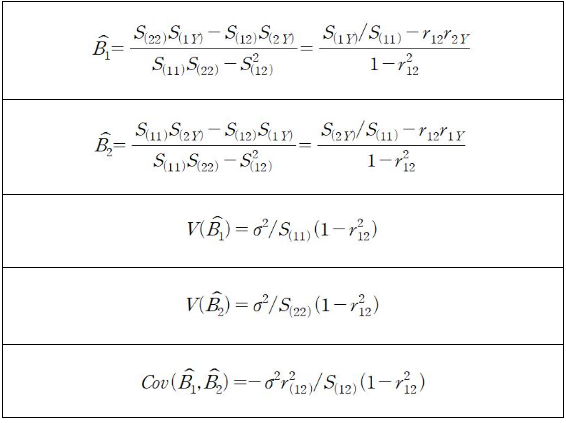

1) 독립변수 X1과 X2가 완벽한 선형종속을 띌 경우,
 - 'r12 = 1'이 되므로 위의 다섯 가지 공식 모두 분모가 0이 되어 불능이 됨
 - 즉, 회귀계수가 구해지지 않고, 분산 또한 정의되지 않음  
 
2) 독립변수 X1과 X2가 완벽한 선형종속은 아니지만 강한 상관관계를 가질 경우,
 - 'r12'가 ±1에 가까운 값을 가지게 되어 회귀계수와 공분산이 굉장히 큰 값을 가지게 됨
 - 즉, 회귀계수가 구해는지지만 유의하지 않게 됨
 
  
### 다중공선성 판단 방법
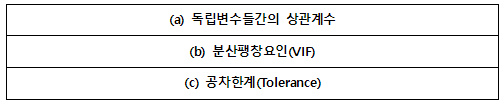

(a) 독립변수들간의 상관계수
 - 독립변수들간의 피어슨 상관계수를 통해 확인할 수 있는데 일반적으로 ±0.9 이상의 값이 나오면 매우 높은 상관관계로서 다중공선성 문제가 발생한다고 판단  
 
(b) 분산팽창요인(VIF)
 - 분산팽창요인에 의한 척도인데 식은 다음과 같고, 보통 VIF 값이 10 이상이면 다중공선성에 문제가 있다고 판단  
 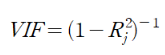
 
(c) 공차한계(Tolerance)
 - 공차한계는 위의 공식을 통해 구해지는 VIF 값의 역수
 - 공차한계의 최대값은 1이고 이 때 구해진 공차한계가 0.1 이하이면 다중공선성에 문제가 있다고 판단
 
 
 ### 다중공선성 해결 방법
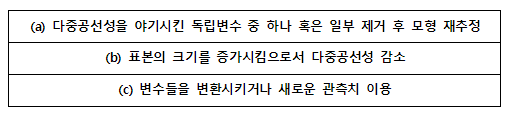

# 3. 실습

### 필요한 모듈 Import

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score
from patsy import dmatrices
import warnings
warnings.filterwarnings("ignore")

### 데이터 탐색

In [11]:
# https://www.kaggle.com/klkwak/toyotacorollacsv
toyota = pd.read_csv('ToyotaCorolla.csv')

In [12]:
#1436행의 데이터셋, 변수는 총 37개
toyota

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [13]:
#변수 형식 확인
toyota.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
d

In [14]:
toyota.describe(include='all')

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,NaN,NaN,NaN,NaN,NaN,Petrol,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,107,NaN,NaN,NaN,NaN,NaN,1264,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,721.555014,NaN,10730.824513,55.947075,5.548747,1999.625348,68533.259749,NaN,101.502089,0.674791,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,NaN,3626.964585,18.599988,3.354085,1.540722,37506.448872,NaN,14.981080,0.468616,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,NaN,4350.000000,1.000000,1.000000,1998.000000,1.000000,NaN,69.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,NaN,8450.000000,44.000000,3.000000,1998.000000,43000.000000,NaN,90.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,NaN,9900.000000,61.000000,5.000000,1999.000000,63389.500000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,NaN,11950.000000,70.000000,8.000000,2001.000000,87020.750000,NaN,110.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000


In [16]:
#분석에 불필요하다고 판단되는 ID, Model 변수 제거
#Cylinders 변수는 범주가 한 가지 밖에 없으므로 제거
toyota = toyota.drop(['Id', 'Model', 'Cylinders'], axis=1)
toyota

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,0,2000,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,0,2000,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,0,2000,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,0,2000,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,0,2000,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,0,1300,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,Petrol,86,0,0,1300,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,Petrol,86,0,0,1300,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,Petrol,86,1,0,1300,...,0,0,0,0,0,0,1,0,0,0


In [17]:
#Mfg_Month 변수는 범주형 변수로 변경하여 이후에 분석에서 더미변수로 활용
toyota['Mfg_Month'] = toyota['Mfg_Month'].astype('str')

In [18]:
#선택한 변수가 범주형으로 변경되었음을 확인
toyota.dtypes

Price                int64
Age_08_04            int64
Mfg_Month           object
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Automatic            int64
cc                   int64
Doors                int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
Tow_Bar              int64
dtype: object

In [19]:
#모든 변수에 결측치가 없음을 확인
toyota.isnull().sum()

Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [184]:
#Train:Test = 7:3으로 데이터 분할
train = toyota[:1000]
test = toyota[1000:]

In [185]:
#y에 Price를 할당하고, X에 나머지 변수들을 모두 할당함 (이때, 범주형 변수들의 더미변수 변환이 함께 진행됨)
features = 'Age_08_04+Mfg_Month+Mfg_Year+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_1+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Power_Steering+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
y, X = dmatrices("Price~" + features, data=train, return_type="dataframe")

In [186]:
#y와 X를 다시 합쳐서 더미변수 처리가 완료된 데이터셋을 생성함
toyota_dummy = pd.concat([y,X],axis=1)
toyota_dummy = toyota_dummy.drop(['Intercept'], axis=1)
toyota_dummy

,Price,Mfg_Month[T.10],Mfg_Month[T.11],Mfg_Month[T.12],Mfg_Month[T.2],Mfg_Month[T.3],Mfg_Month[T.4],Mfg_Month[T.5],Mfg_Month[T.6],Mfg_Month[T.7],...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,13750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,13950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,14950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13750.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,9950.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
997,9950.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,9900.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


===================================================================================================================  
아래 코드부터 표시선 전까지의 코드는 VIF와 p-value를 함께 고려하여 다중공선성이 의심되는 독립변수를 제거하는 과정임

In [187]:
X = X.drop(['Intercept'], axis=1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.586643,Mfg_Month[T.10]
1,1.398046,Mfg_Month[T.11]
2,1.370059,Mfg_Month[T.12]
3,1.773217,Mfg_Month[T.2]
4,1.647378,Mfg_Month[T.3]
5,1.854907,Mfg_Month[T.4]
6,1.677374,Mfg_Month[T.5]
7,1.624634,Mfg_Month[T.6]
8,1.764783,Mfg_Month[T.7]
9,1.668441,Mfg_Month[T.8]


In [188]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:52:13   Log-Likelihood:                -8436.3
No. Observations:                1000   AIC:                         1.696e+04
Df Residuals:                     957   BIC:                         1.717e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.9538      0.307     -6.373      0.000      -2.555      -1.352
Mfg_Month[T.10]      -834.8661    171.732     -4.861      0.000   -1171.880    -497.852
Mfg_Month[T.11]     -1075.2886    196.730     -5.466      0.000   -1461.361    -689.216
Mfg_Month[T.12]     -1008.4688    208.515     -4.836      0.000   -1417.668    -599.269
Mfg_Month[T.2]         40.8856    150.398      0.272      0.786    -254.261     336.033
Mfg_Month[T.3]        -92.8243    157.873     -0.588      0.557    -402.641     216.992
Mfg_Month[T.4]       -263.8216    146.795     -1.797      0.073    -551.899      24.256
Mfg_Month[T.5]       -150.9636    158.385     -0.953      0.341    -461.786     159.859
Mfg_Month[T.6]       -425.3316    159.587     -2.665      0.008    -738.513    -112.150
Mfg_Month[T.7]       -684.6143    153.071     -4.473      0.000    -985.007    -384.221
Mfg_Month[T.8]       -470.1521    162.708     -2.890      0.004    -789.457    -150.847
Mfg_Month[T.9]       -807.4247    190.545     -4.237      0.000   -1181.360    -433.490
Fuel_Type[T.Diesel]   820.6672    367.943      2.230      0.026      98.599    1542.736
Fuel_Type[T.Petrol]  2039.6204    383.249      5.322      0.000    1287.515    2791.726
Age_08_04            -130.3512      4.586    -28.422      0.000    -139.352    -121.351
Mfg_Year                1.2802      0.817      1.567      0.117      -0.323       2.883
KM                     -0.0195      0.002    -12.664      0.000      -0.022      -0.016
HP                     28.6327      3.581      7.995      0.000      21.605      35.661
Met_Color             -27.7898     83.578     -0.333      0.740    -191.807     136.228
Automatic             289.7450    178.401      1.624      0.105     -60.357     639.847
cc                     -0.1088      0.081     -1.344      0.179      -0.268       0.050
Doors                  50.6453     43.582      1.162      0.246     -34.883     136.173
Gears                 -41.1141    197.035     -0.209      0.835    -427.785     345.556
Quarterly_Tax          17.2179      2.000      8.610      0.000      13.294      21.142
Weight                  9.4910      1.249      7.601      0.000       7.041      11.942
Mfr_Guarantee         246.3813     79.962      3.081      0.002      89.461     403.301
BOVAG_Guarantee       555.7770    141.873      3.917      0.000     277.358     834.196
ABS                   189.6706    185.021      1.025      0.306    -173.424     552.765
Airbag_1              242.0705    352.004      0.688      0.492    -448.718     932.859
Airbag_2              168.9996    167.648      1.008      0.314    -160.001     498.000
Airco                 237.7182    102.201      2.326      0.020      37.154     438.282
Automatic_airco      1955.7200    185.350     10.552      0.000    1591.981    2319.459
Boa

In [189]:
X = X.drop(['Mfg_Year'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_1+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Power_Steering+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.576061,Mfg_Month[T.10]
1,1.380220,Mfg_Month[T.11]
2,1.352570,Mfg_Month[T.12]
3,1.763880,Mfg_Month[T.2]
4,1.645602,Mfg_Month[T.3]
5,1.849340,Mfg_Month[T.4]
6,1.674437,Mfg_Month[T.5]
7,1.618844,Mfg_Month[T.6]
8,1.753096,Mfg_Month[T.7]
9,1.664194,Mfg_Month[T.8]


In [190]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:52:14   Log-Likelihood:                -8436.3
No. Observations:                1000   AIC:                         1.696e+04
Df Residuals:                     957   BIC:                         1.717e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2564.4555   1637.644      1.566      0.118    -649.332    5778.243
Mfg_Month[T.10]      -835.8262    171.783     -4.866      0.000   -1172.941    -498.712
Mfg_Month[T.11]     -1076.3554    196.809     -5.469      0.000   -1462.581    -690.129
Mfg_Month[T.12]     -1009.6423    208.601     -4.840      0.000   -1419.011    -600.274
Mfg_Month[T.2]         40.7790    150.402      0.271      0.786    -254.378     335.936
Mfg_Month[T.3]        -93.0377    157.877     -0.589      0.556    -402.863     216.788
Mfg_Month[T.4]       -264.1417    146.807     -1.799      0.072    -552.242      23.958
Mfg_Month[T.5]       -151.3904    158.397     -0.956      0.339    -462.236     159.455
Mfg_Month[T.6]       -425.8651    159.608     -2.668      0.008    -739.087    -112.643
Mfg_Month[T.7]       -685.2544    153.105     -4.476      0.000    -985.714    -384.795
Mfg_Month[T.8]       -470.8989    162.733     -2.894      0.004    -790.253    -151.545
Mfg_Month[T.9]       -808.2781    190.591     -4.241      0.000   -1182.302    -434.254
Fuel_Type[T.Diesel]   820.6672    367.943      2.230      0.026      98.599    1542.736
Fuel_Type[T.Petrol]  2039.6204    383.249      5.322      0.000    1287.515    2791.726
Age_08_04            -130.4579      4.605    -28.328      0.000    -139.496    -121.420
KM                     -0.0195      0.002    -12.664      0.000      -0.022      -0.016
HP                     28.6327      3.581      7.995      0.000      21.605      35.661
Met_Color             -27.7898     83.578     -0.333      0.740    -191.807     136.228
Automatic             289.7450    178.401      1.624      0.105     -60.357     639.847
cc                     -0.1088      0.081     -1.344      0.179      -0.268       0.050
Doors                  50.6453     43.582      1.162      0.246     -34.883     136.173
Gears                 -41.1141    197.035     -0.209      0.835    -427.785     345.556
Quarterly_Tax          17.2179      2.000      8.610      0.000      13.294      21.142
Weight                  9.4910      1.249      7.601      0.000       7.041      11.942
Mfr_Guarantee         246.3813     79.962      3.081      0.002      89.461     403.301
BOVAG_Guarantee       555.7770    141.873      3.917      0.000     277.358     834.196
ABS                   189.6706    185.021      1.025      0.306    -173.424     552.765
Airbag_1              242.0705    352.004      0.688      0.492    -448.718     932.859
Airbag_2              168.9996    167.648      1.008      0.314    -160.001     498.000
Airco                 237.7182    102.201      2.326      0.020      37.154     438.282
Automatic_airco      1955.7200    185.350     10.552      0.000    1591.981    2319.459
Boardcomputer        -481.2979    114.741     -4.195      0.000    -706.471    -256.125
CD_

In [191]:
X = X.drop(['Gears'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_1+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Power_Steering+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.558854,Mfg_Month[T.10]
1,1.379301,Mfg_Month[T.11]
2,1.345758,Mfg_Month[T.12]
3,1.754633,Mfg_Month[T.2]
4,1.645402,Mfg_Month[T.3]
5,1.842591,Mfg_Month[T.4]
6,1.673202,Mfg_Month[T.5]
7,1.613841,Mfg_Month[T.6]
8,1.747946,Mfg_Month[T.7]
9,1.645864,Mfg_Month[T.8]


In [192]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     240.1
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:52:15   Log-Likelihood:                -8436.4
No. Observations:                1000   AIC:                         1.696e+04
Df Residuals:                     958   BIC:                         1.716e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2379.3606   1375.911      1.729      0.084    -320.788    5079.509
Mfg_Month[T.10]      -837.3088    171.550     -4.881      0.000   -1173.966    -500.652
Mfg_Month[T.11]     -1072.8826    196.006     -5.474      0.000   -1457.533    -688.233
Mfg_Month[T.12]     -1009.4739    208.495     -4.842      0.000   -1418.634    -600.314
Mfg_Month[T.2]         40.1151    150.294      0.267      0.790    -254.828     335.058
Mfg_Month[T.3]        -92.7414    157.792     -0.588      0.557    -402.399     216.917
Mfg_Month[T.4]       -264.7628    146.703     -1.805      0.071    -552.659      23.134
Mfg_Month[T.5]       -151.3644    158.318     -0.956      0.339    -462.054     159.326
Mfg_Month[T.6]       -426.3033    159.515     -2.673      0.008    -739.342    -113.265
Mfg_Month[T.7]       -685.2508    153.028     -4.478      0.000    -985.560    -384.942
Mfg_Month[T.8]       -472.9085    162.366     -2.913      0.004    -791.543    -154.274
Mfg_Month[T.9]       -809.0562    190.459     -4.248      0.000   -1182.821    -435.291
Fuel_Type[T.Diesel]   812.6122    365.730      2.222      0.027      94.888    1530.336
Fuel_Type[T.Petrol]  2031.3909    381.024      5.331      0.000    1283.653    2779.129
Age_08_04            -130.5035      4.598    -28.384      0.000    -139.527    -121.481
KM                     -0.0195      0.002    -12.702      0.000      -0.022      -0.016
HP                     28.4807      3.505      8.127      0.000      21.603      35.358
Met_Color             -28.1296     83.521     -0.337      0.736    -192.034     135.775
Automatic             293.7949    177.254      1.657      0.098     -54.055     641.645
cc                     -0.1090      0.081     -1.347      0.178      -0.268       0.050
Doors                  52.2232     42.900      1.217      0.224     -31.965     136.412
Quarterly_Tax          17.1942      1.996      8.616      0.000      13.278      21.110
Weight                  9.4941      1.248      7.607      0.000       7.045      11.943
Mfr_Guarantee         246.4653     79.921      3.084      0.002      89.626     403.305
BOVAG_Guarantee       555.1501    141.771      3.916      0.000     276.933     833.367
ABS                   187.8445    184.722      1.017      0.309    -174.662     550.351
Airbag_1              245.3693    351.473      0.698      0.485    -444.377     935.115
Airbag_2              167.8409    167.472      1.002      0.317    -160.814     496.496
Airco                 236.4876    101.980      2.319      0.021      36.358     436.617
Automatic_airco      1957.5834    185.042     10.579      0.000    1594.449    2320.718
Boardcomputer        -481.4152    114.683     -4.198      0.000    -706.473    -256.357
CD_Player             166.4964    100.192      1.662      0.097     -30.124     363.117
Cen

In [193]:
X = X.drop(['Power_Steering'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_1+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.558822,Mfg_Month[T.10]
1,1.378951,Mfg_Month[T.11]
2,1.345596,Mfg_Month[T.12]
3,1.754620,Mfg_Month[T.2]
4,1.641955,Mfg_Month[T.3]
5,1.842049,Mfg_Month[T.4]
6,1.672079,Mfg_Month[T.5]
7,1.612207,Mfg_Month[T.6]
8,1.739630,Mfg_Month[T.7]
9,1.645800,Mfg_Month[T.8]


In [194]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     246.1
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:53:06   Log-Likelihood:                -8436.8
No. Observations:                1000   AIC:                         1.696e+04
Df Residuals:                     959   BIC:                         1.716e+04
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2196.0648   1361.002      1.614      0.107    -474.820    4866.950
Mfg_Month[T.10]      -833.6903    171.489     -4.861      0.000   -1170.227    -497.154
Mfg_Month[T.11]     -1067.8804    195.911     -5.451      0.000   -1452.345    -683.416
Mfg_Month[T.12]     -1003.6495    208.379     -4.816      0.000   -1412.581    -594.718
Mfg_Month[T.2]         41.7566    150.270      0.278      0.781    -253.139     336.652
Mfg_Month[T.3]        -85.5146    157.579     -0.543      0.587    -394.753     223.724
Mfg_Month[T.4]       -260.9412    146.630     -1.780      0.075    -548.694      26.812
Mfg_Month[T.5]       -146.5906    158.217     -0.927      0.354    -457.082     163.901
Mfg_Month[T.6]       -420.0016    159.350     -2.636      0.009    -732.717    -107.286
Mfg_Month[T.7]       -673.7492    152.493     -4.418      0.000    -973.008    -374.491
Mfg_Month[T.8]       -469.7958    162.316     -2.894      0.004    -788.331    -151.261
Mfg_Month[T.9]       -802.8583    190.321     -4.218      0.000   -1176.351    -429.365
Fuel_Type[T.Diesel]   830.8162    365.151      2.275      0.023     114.229    1547.404
Fuel_Type[T.Petrol]  2084.3961    376.523      5.536      0.000    1345.493    2823.299
Age_08_04            -130.5081      4.597    -28.387      0.000    -139.530    -121.486
KM                     -0.0195      0.002    -12.711      0.000      -0.022      -0.016
HP                     28.2807      3.497      8.086      0.000      21.417      35.144
Met_Color             -30.5356     83.471     -0.366      0.715    -194.343     133.272
Automatic             292.0200    177.227      1.648      0.100     -55.778     639.818
cc                     -0.1100      0.081     -1.360      0.174      -0.269       0.049
Doors                  50.6776     42.863      1.182      0.237     -33.438     134.793
Quarterly_Tax          17.4194      1.980      8.798      0.000      13.534      21.305
Weight                  9.5111      1.248      7.623      0.000       7.063      11.960
Mfr_Guarantee         249.7495     79.832      3.128      0.002      93.084     406.415
BOVAG_Guarantee       549.3489    141.615      3.879      0.000     271.438     827.260
ABS                   147.3893    179.289      0.822      0.411    -204.456     499.234
Airbag_1               82.4262    302.537      0.272      0.785    -511.285     676.138
Airbag_2              169.3250    167.450      1.011      0.312    -159.285     497.935
Airco                 236.5803    101.971      2.320      0.021      36.469     436.692
Automatic_airco      1952.8541    184.953     10.559      0.000    1589.895    2315.813
Boardcomputer        -477.3599    114.586     -4.166      0.000    -702.228    -252.492
CD_Player             166.8683    100.182      1.666      0.096     -29.733     363.470
Cen

In [195]:
X = X.drop(['Airbag_1'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.553018,Mfg_Month[T.10]
1,1.376584,Mfg_Month[T.11]
2,1.343872,Mfg_Month[T.12]
3,1.751695,Mfg_Month[T.2]
4,1.641301,Mfg_Month[T.3]
5,1.842043,Mfg_Month[T.4]
6,1.672073,Mfg_Month[T.5]
7,1.611773,Mfg_Month[T.6]
8,1.738342,Mfg_Month[T.7]
9,1.645626,Mfg_Month[T.8]


In [196]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     252.7
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:54:50   Log-Likelihood:                -8436.8
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     960   BIC:                         1.715e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2276.1542   1328.236      1.714      0.087    -330.426    4882.735
Mfg_Month[T.10]      -832.2017    171.319     -4.858      0.000   -1168.405    -495.998
Mfg_Month[T.11]     -1066.6622    195.766     -5.449      0.000   -1450.841    -682.484
Mfg_Month[T.12]     -1003.3158    208.275     -4.817      0.000   -1412.042    -594.590
Mfg_Month[T.2]         42.4977    150.173      0.283      0.777    -252.207     337.202
Mfg_Month[T.3]        -84.9313    157.488     -0.539      0.590    -393.992     224.129
Mfg_Month[T.4]       -261.6719    146.535     -1.786      0.074    -549.238      25.894
Mfg_Month[T.5]       -146.9507    158.135     -0.929      0.353    -457.281     163.380
Mfg_Month[T.6]       -420.0266    159.273     -2.637      0.008    -732.591    -107.462
Mfg_Month[T.7]       -673.4488    152.415     -4.419      0.000    -972.555    -374.343
Mfg_Month[T.8]       -470.3073    162.227     -2.899      0.004    -788.667    -151.947
Mfg_Month[T.9]       -802.3986    190.221     -4.218      0.000   -1175.696    -429.101
Fuel_Type[T.Diesel]   841.2521    362.961      2.318      0.021     128.963    1553.542
Fuel_Type[T.Petrol]  2094.0061    374.686      5.589      0.000    1358.708    2829.304
Age_08_04            -130.5703      4.590    -28.450      0.000    -139.577    -121.564
KM                     -0.0195      0.002    -12.718      0.000      -0.022      -0.016
HP                     28.2802      3.496      8.090      0.000      21.420      35.140
Met_Color             -28.7787     83.182     -0.346      0.729    -192.018     134.460
Automatic             293.8877    177.009      1.660      0.097     -53.482     641.257
cc                     -0.1101      0.081     -1.361      0.174      -0.269       0.049
Doors                  51.0115     42.824      1.191      0.234     -33.029     135.052
Quarterly_Tax          17.4384      1.978      8.817      0.000      13.557      21.320
Weight                  9.4829      1.243      7.630      0.000       7.044      11.922
Mfr_Guarantee         248.5259     79.667      3.120      0.002      92.184     404.868
BOVAG_Guarantee       553.5251    140.715      3.934      0.000     277.380     829.670
ABS                   159.6068    173.507      0.920      0.358    -180.890     500.104
Airbag_2              173.3149    166.728      1.040      0.299    -153.878     500.508
Airco                 235.5000    101.844      2.312      0.021      35.636     435.363
Automatic_airco      1955.2812    184.649     10.589      0.000    1592.919    2317.644
Boardcomputer        -479.0193    114.369     -4.188      0.000    -703.461    -254.578
CD_Player             166.3973    100.119      1.662      0.097     -30.080     362.875
Central_Lock         -203.5823    157.534     -1.292      0.197    -512.732     105.568
Pow

In [197]:
X = X.drop(['Radio'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.552487,Mfg_Month[T.10]
1,1.376267,Mfg_Month[T.11]
2,1.343851,Mfg_Month[T.12]
3,1.751554,Mfg_Month[T.2]
4,1.641287,Mfg_Month[T.3]
5,1.837918,Mfg_Month[T.4]
6,1.672050,Mfg_Month[T.5]
7,1.611758,Mfg_Month[T.6]
8,1.738291,Mfg_Month[T.7]
9,1.645538,Mfg_Month[T.8]


In [198]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     259.3
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:55:36   Log-Likelihood:                -8437.3
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     961   BIC:                         1.714e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2293.5819   1328.121      1.727      0.085    -312.771    4899.934
Mfg_Month[T.10]      -829.3694    171.296     -4.842      0.000   -1165.526    -493.213
Mfg_Month[T.11]     -1063.9317    195.747     -5.435      0.000   -1448.072    -679.791
Mfg_Month[T.12]     -1002.8838    208.274     -4.815      0.000   -1411.609    -594.159
Mfg_Month[T.2]         43.6236    150.168      0.290      0.771    -251.072     338.319
Mfg_Month[T.3]        -84.5447    157.488     -0.537      0.592    -393.604     224.515
Mfg_Month[T.4]       -254.9004    146.378     -1.741      0.082    -542.158      32.358
Mfg_Month[T.5]       -146.4603    158.135     -0.926      0.355    -456.789     163.869
Mfg_Month[T.6]       -419.7060    159.273     -2.635      0.009    -732.269    -107.143
Mfg_Month[T.7]       -672.8167    152.414     -4.414      0.000    -971.920    -373.714
Mfg_Month[T.8]       -469.3394    162.224     -2.893      0.004    -787.693    -150.986
Mfg_Month[T.9]       -800.9557    190.216     -4.211      0.000   -1174.242    -427.669
Fuel_Type[T.Diesel]   844.8052    362.944      2.328      0.020     132.551    1557.060
Fuel_Type[T.Petrol]  2095.8570    374.681      5.594      0.000    1360.569    2831.145
Age_08_04            -130.4667      4.588    -28.434      0.000    -139.471    -121.462
KM                     -0.0196      0.002    -12.776      0.000      -0.023      -0.017
HP                     28.3011      3.496      8.096      0.000      21.441      35.161
Met_Color             -28.3596     83.181     -0.341      0.733    -191.596     134.877
Automatic             293.5932    177.009      1.659      0.098     -53.775     640.962
cc                     -0.1098      0.081     -1.358      0.175      -0.269       0.049
Doors                  50.5032     42.821      1.179      0.239     -33.531     134.537
Quarterly_Tax          17.4803      1.977      8.840      0.000      13.600      21.361
Weight                  9.4587      1.243      7.612      0.000       7.020      11.897
Mfr_Guarantee         251.0944     79.626      3.153      0.002      94.834     407.355
BOVAG_Guarantee       556.8770    140.675      3.959      0.000     280.811     832.943
ABS                   164.3707    173.442      0.948      0.344    -175.997     504.739
Airbag_2              166.4295    166.585      0.999      0.318    -160.484     493.342
Airco                 238.8111    101.791      2.346      0.019      39.054     438.569
Automatic_airco      1949.3389    184.553     10.562      0.000    1587.165    2311.513
Boardcomputer        -479.9652    114.365     -4.197      0.000    -704.399    -255.532
CD_Player             169.6354    100.067      1.695      0.090     -26.739     366.010
Central_Lock         -194.3982    157.266     -1.236      0.217    -503.022     114.225
Pow

In [199]:
X = X.drop(['Doors'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.550864,Mfg_Month[T.10]
1,1.371778,Mfg_Month[T.11]
2,1.343814,Mfg_Month[T.12]
3,1.751239,Mfg_Month[T.2]
4,1.640841,Mfg_Month[T.3]
5,1.834022,Mfg_Month[T.4]
6,1.672027,Mfg_Month[T.5]
7,1.610329,Mfg_Month[T.6]
8,1.731650,Mfg_Month[T.7]
9,1.641098,Mfg_Month[T.8]


In [200]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        17:56:16   Log-Likelihood:                -8438.1
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     962   BIC:                         1.714e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2006.5221   1305.893      1.537      0.125    -556.206    4569.250
Mfg_Month[T.10]      -830.6753    171.327     -4.848      0.000   -1166.893    -494.458
Mfg_Month[T.11]     -1047.2874    195.277     -5.363      0.000   -1430.506    -664.069
Mfg_Month[T.12]      -997.9432    208.274     -4.791      0.000   -1406.668    -589.219
Mfg_Month[T.2]         44.7550    150.196      0.298      0.766    -249.994     339.504
Mfg_Month[T.3]        -86.5002    157.511     -0.549      0.583    -395.605     222.604
Mfg_Month[T.4]       -260.3167    146.336     -1.779      0.076    -547.491      26.858
Mfg_Month[T.5]       -145.5644    158.165     -0.920      0.358    -455.952     164.823
Mfg_Month[T.6]       -411.5278    159.154     -2.586      0.010    -723.858     -99.198
Mfg_Month[T.7]       -658.8810    151.986     -4.335      0.000    -957.144    -360.618
Mfg_Month[T.8]       -475.5618    162.171     -2.932      0.003    -793.811    -157.312
Mfg_Month[T.9]       -800.9540    190.255     -4.210      0.000   -1174.316    -427.592
Fuel_Type[T.Diesel]   800.9689    361.109      2.218      0.027      92.316    1509.622
Fuel_Type[T.Petrol]  2134.1284    373.349      5.716      0.000    1401.455    2866.802
Age_08_04            -130.7593      4.583    -28.534      0.000    -139.752    -121.766
KM                     -0.0194      0.002    -12.720      0.000      -0.022      -0.016
HP                     27.7536      3.465      8.009      0.000      20.953      34.554
Met_Color             -20.5507     82.934     -0.248      0.804    -183.302     142.201
Automatic             279.1827    176.622      1.581      0.114     -67.427     625.792
cc                     -0.1072      0.081     -1.326      0.185      -0.266       0.051
Quarterly_Tax          17.6180      1.974      8.924      0.000      13.744      21.492
Weight                  9.9202      1.180      8.410      0.000       7.605      12.235
Mfr_Guarantee         252.1147     79.637      3.166      0.002      95.832     408.398
BOVAG_Guarantee       557.5201    140.703      3.962      0.000     281.400     833.640
ABS                   182.1127    172.823      1.054      0.292    -157.041     521.267
Airbag_2              168.9566    166.605      1.014      0.311    -157.995     495.909
Airco                 242.5619    101.762      2.384      0.017      42.862     442.262
Automatic_airco      1935.1986    184.201     10.506      0.000    1573.716    2296.681
Boardcomputer        -487.6846    114.201     -4.270      0.000    -711.796    -263.574
CD_Player             167.6827    100.073      1.676      0.094     -28.704     364.070
Central_Lock         -183.4436    157.023     -1.168      0.243    -491.591     124.703
Powered_Windows       558.1154    156.514      3.566      0.000     250.968     865.263
Mis

In [201]:
X = X.drop(['Airbag_2'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.550258,Mfg_Month[T.10]
1,1.371264,Mfg_Month[T.11]
2,1.343769,Mfg_Month[T.12]
3,1.750617,Mfg_Month[T.2]
4,1.640837,Mfg_Month[T.3]
5,1.832737,Mfg_Month[T.4]
6,1.671704,Mfg_Month[T.5]
7,1.609930,Mfg_Month[T.6]
8,1.731622,Mfg_Month[T.7]
9,1.637799,Mfg_Month[T.8]


In [202]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     273.5
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:00:48   Log-Likelihood:                -8438.6
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     963   BIC:                         1.713e+04
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2069.5995   1304.430      1.587      0.113    -490.254    4629.453
Mfg_Month[T.10]      -828.4389    171.315     -4.836      0.000   -1164.633    -492.245
Mfg_Month[T.11]     -1051.8290    195.229     -5.388      0.000   -1434.952    -668.706
Mfg_Month[T.12]      -998.0980    208.277     -4.792      0.000   -1406.828    -589.368
Mfg_Month[T.2]         46.8310    150.184      0.312      0.755    -247.895     341.557
Mfg_Month[T.3]        -86.5242    157.513     -0.549      0.583    -395.633     222.584
Mfg_Month[T.4]       -264.8081    146.271     -1.810      0.071    -551.855      22.239
Mfg_Month[T.5]       -148.1410    158.147     -0.937      0.349    -458.493     162.211
Mfg_Month[T.6]       -414.6108    159.128     -2.606      0.009    -726.888    -102.334
Mfg_Month[T.7]       -658.8519    151.989     -4.335      0.000    -957.119    -360.585
Mfg_Month[T.8]       -469.0829    162.047     -2.895      0.004    -787.090    -151.076
Mfg_Month[T.9]       -797.0720    190.219     -4.190      0.000   -1170.363    -423.781
Fuel_Type[T.Diesel]   808.1950    361.044      2.238      0.025      99.671    1516.719
Fuel_Type[T.Petrol]  2155.7328    372.747      5.783      0.000    1424.244    2887.222
Age_08_04            -130.6081      4.580    -28.516      0.000    -139.596    -121.620
KM                     -0.0194      0.002    -12.715      0.000      -0.022      -0.016
HP                     27.8169      3.465      8.028      0.000      21.017      34.617
Met_Color             -18.6240     82.913     -0.225      0.822    -181.335     144.087
Automatic             281.8138    176.606      1.596      0.111     -64.763     628.391
cc                     -0.1010      0.081     -1.253      0.211      -0.259       0.057
Quarterly_Tax          17.8664      1.959      9.120      0.000      14.022      21.711
Weight                  9.8152      1.175      8.353      0.000       7.509      12.121
Mfr_Guarantee         253.8091     79.621      3.188      0.001      97.558     410.060
BOVAG_Guarantee       551.6763    140.587      3.924      0.000     275.784     827.568
ABS                   238.2573    163.718      1.455      0.146     -83.028     559.542
Airco                 241.0173    101.752      2.369      0.018      41.337     440.698
Automatic_airco      1938.7880    184.170     10.527      0.000    1577.368    2300.208
Boardcomputer        -476.8616    113.703     -4.194      0.000    -699.995    -253.728
CD_Player             174.6894     99.836      1.750      0.080     -21.232     370.610
Central_Lock         -195.9377    156.541     -1.252      0.211    -503.139     111.264
Powered_Windows       561.6511    156.477      3.589      0.000     254.576     868.726
Mistlamps              68.8435    117.512      0.586      0.558    -161.766     299.453
Spo

In [203]:
X = X.drop(['ABS'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.548862,Mfg_Month[T.10]
1,1.370900,Mfg_Month[T.11]
2,1.343543,Mfg_Month[T.12]
3,1.750438,Mfg_Month[T.2]
4,1.640837,Mfg_Month[T.3]
5,1.831753,Mfg_Month[T.4]
6,1.670762,Mfg_Month[T.5]
7,1.609288,Mfg_Month[T.6]
8,1.728854,Mfg_Month[T.7]
9,1.636226,Mfg_Month[T.8]


In [204]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     280.9
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:01:29   Log-Likelihood:                -8439.7
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     964   BIC:                         1.713e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2428.8727   1281.598      1.895      0.058     -86.172    4943.917
Mfg_Month[T.10]      -842.3600    171.147     -4.922      0.000   -1178.224    -506.496
Mfg_Month[T.11]     -1060.4220    195.252     -5.431      0.000   -1443.591    -677.253
Mfg_Month[T.12]     -1002.1083    208.380     -4.809      0.000   -1411.039    -593.178
Mfg_Month[T.2]         44.5270    150.263      0.296      0.767    -250.353     339.407
Mfg_Month[T.3]        -87.8647    157.602     -0.558      0.577    -397.147     221.417
Mfg_Month[T.4]       -263.2427    146.352     -1.799      0.072    -550.448      23.962
Mfg_Month[T.5]       -155.4823    158.158     -0.983      0.326    -465.856     154.891
Mfg_Month[T.6]       -413.1833    159.217     -2.595      0.010    -725.635    -100.731
Mfg_Month[T.7]       -653.5622    152.033     -4.299      0.000    -951.916    -355.208
Mfg_Month[T.8]       -466.8456    162.134     -2.879      0.004    -785.022    -148.669
Mfg_Month[T.9]       -788.8304    190.245     -4.146      0.000   -1162.172    -415.489
Fuel_Type[T.Diesel]   849.7976    360.119      2.360      0.018     143.089    1556.506
Fuel_Type[T.Petrol]  2148.7834    372.932      5.762      0.000    1416.931    2880.636
Age_08_04            -131.4385      4.547    -28.905      0.000    -140.362    -122.515
KM                     -0.0193      0.002    -12.649      0.000      -0.022      -0.016
HP                     28.3141      3.450      8.207      0.000      21.544      35.085
Met_Color             -19.4944     82.959     -0.235      0.814    -182.295     143.307
Automatic             297.6773    176.371      1.688      0.092     -48.439     643.794
cc                     -0.0979      0.081     -1.214      0.225      -0.256       0.060
Quarterly_Tax          17.6690      1.956      9.035      0.000      13.831      21.507
Weight                  9.6427      1.170      8.243      0.000       7.347      11.938
Mfr_Guarantee         255.0348     79.663      3.201      0.001      98.702     411.367
BOVAG_Guarantee       555.5318    140.643      3.950      0.000     279.529     831.534
Airco                 242.2104    101.807      2.379      0.018      42.421     442.000
Automatic_airco      1938.4043    184.276     10.519      0.000    1576.775    2300.033
Boardcomputer        -474.2199    113.754     -4.169      0.000    -697.454    -250.986
CD_Player             174.4731     99.894      1.747      0.081     -21.561     370.507
Central_Lock         -184.7031    156.441     -1.181      0.238    -491.708     122.302
Powered_Windows       551.9022    156.424      3.528      0.000     244.931     858.873
Mistlamps              74.6433    117.513      0.635      0.525    -155.967     305.254
Sport_Model           371.6608     94.790      3.921      0.000     185.642     557.680
Bac

In [205]:
X = X.drop(['cc'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.548459,Mfg_Month[T.10]
1,1.370872,Mfg_Month[T.11]
2,1.342648,Mfg_Month[T.12]
3,1.749651,Mfg_Month[T.2]
4,1.640392,Mfg_Month[T.3]
5,1.831277,Mfg_Month[T.4]
6,1.670653,Mfg_Month[T.5]
7,1.608873,Mfg_Month[T.6]
8,1.728323,Mfg_Month[T.7]
9,1.619685,Mfg_Month[T.8]


In [206]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     289.0
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:02:09   Log-Likelihood:                -8440.5
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     965   BIC:                         1.712e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2366.7176   1280.891      1.848      0.065    -146.936    4880.371
Mfg_Month[T.10]      -844.5743    171.180     -4.934      0.000   -1180.501    -508.647
Mfg_Month[T.11]     -1060.8130    195.300     -5.432      0.000   -1444.075    -677.551
Mfg_Month[T.12]     -1007.1958    208.389     -4.833      0.000   -1416.144    -598.248
Mfg_Month[T.2]         41.4691    150.279      0.276      0.783    -253.441     336.380
Mfg_Month[T.3]        -90.7599    157.623     -0.576      0.565    -400.082     218.563
Mfg_Month[T.4]       -265.4992    146.376     -1.814      0.070    -552.751      21.753
Mfg_Month[T.5]       -156.7245    158.194     -0.991      0.322    -467.168     153.718
Mfg_Month[T.6]       -415.7092    159.243     -2.611      0.009    -728.211    -103.208
Mfg_Month[T.7]       -656.1450    152.056     -4.315      0.000    -954.543    -357.747
Mfg_Month[T.8]       -485.6073    161.436     -3.008      0.003    -802.414    -168.801
Mfg_Month[T.9]       -792.8511    190.263     -4.167      0.000   -1166.228    -419.475
Fuel_Type[T.Diesel]   798.2875    357.701      2.232      0.026      96.326    1500.249
Fuel_Type[T.Petrol]  2132.4425    372.781      5.720      0.000    1400.888    2863.997
Age_08_04            -131.4749      4.548    -28.907      0.000    -140.400    -122.549
KM                     -0.0193      0.002    -12.679      0.000      -0.022      -0.016
HP                     27.7970      3.425      8.117      0.000      21.077      34.517
Met_Color             -22.7355     82.936     -0.274      0.784    -185.492     140.021
Automatic             269.3063    174.861      1.540      0.124     -73.845     612.457
Quarterly_Tax          17.5152      1.952      8.973      0.000      13.685      21.346
Weight                  9.6358      1.170      8.236      0.000       7.340      11.932
Mfr_Guarantee         256.8087     79.669      3.223      0.001     100.464     413.153
BOVAG_Guarantee       565.6026    140.433      4.028      0.000     290.013     841.193
Airco                 238.2235    101.779      2.341      0.019      38.489     437.958
Automatic_airco      1918.1324    183.564     10.449      0.000    1557.902    2278.363
Boardcomputer        -467.6897    113.655     -4.115      0.000    -690.729    -244.651
CD_Player             170.1157     99.854      1.704      0.089     -25.840     366.071
Central_Lock         -186.0937    156.476     -1.189      0.235    -493.166     120.978
Powered_Windows       552.0318    156.463      3.528      0.000     244.986     859.078
Mistlamps              80.5921    117.440      0.686      0.493    -149.874     311.058
Sport_Model           378.6175     94.640      4.001      0.000     192.893     564.342
Backseat_Divider     -624.1103    133.715     -4.667      0.000    -886.517    -361.704
Met

In [207]:
X = X.drop(['Central_Lock'], axis=1)
features = 'Age_08_04+Mfg_Month+KM+Fuel_Type+HP+Met_Color+Automatic+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+Airco+Automatic_airco+Boardcomputer+CD_Player+Powered_Windows+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif

,VIF Factor,features
0,1.546395,Mfg_Month[T.10]
1,1.368647,Mfg_Month[T.11]
2,1.340671,Mfg_Month[T.12]
3,1.749293,Mfg_Month[T.2]
4,1.639490,Mfg_Month[T.3]
5,1.828488,Mfg_Month[T.4]
6,1.669003,Mfg_Month[T.5]
7,1.602681,Mfg_Month[T.6]
8,1.723899,Mfg_Month[T.7]
9,1.617235,Mfg_Month[T.8]


In [208]:
reg = ols('Price ~' + features, data=train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     297.6
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:02:57   Log-Likelihood:                -8441.2
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     966   BIC:                         1.712e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2340.7728   1280.980      1.827      0.068    -173.052    4854.597
Mfg_Month[T.10]      -836.7449    171.090     -4.891      0.000   -1172.495    -500.995
Mfg_Month[T.11]     -1051.1975    195.175     -5.386      0.000   -1434.213    -668.182
Mfg_Month[T.12]     -1016.0345    208.301     -4.878      0.000   -1424.810    -607.259
Mfg_Month[T.2]         44.3432    150.291      0.295      0.768    -250.592     339.278
Mfg_Month[T.3]        -86.2605    157.611     -0.547      0.584    -395.560     223.039
Mfg_Month[T.4]       -258.4802    146.288     -1.767      0.078    -545.560      28.600
Mfg_Month[T.5]       -150.6872    158.146     -0.953      0.341    -461.037     159.662
Mfg_Month[T.6]       -403.7558    158.959     -2.540      0.011    -715.701     -91.811
Mfg_Month[T.7]       -646.7635    151.883     -4.258      0.000    -944.823    -348.704
Mfg_Month[T.8]       -477.8070    161.337     -2.962      0.003    -794.419    -161.195
Mfg_Month[T.9]       -777.0735    189.840     -4.093      0.000   -1149.621    -404.526
Fuel_Type[T.Diesel]   794.9913    357.767      2.222      0.027      92.901    1497.082
Fuel_Type[T.Petrol]  2130.5638    372.858      5.714      0.000    1398.860    2862.268
Age_08_04            -131.0196      4.533    -28.903      0.000    -139.915    -122.124
KM                     -0.0194      0.002    -12.771      0.000      -0.022      -0.016
HP                     27.6700      3.424      8.082      0.000      20.951      34.388
Met_Color             -24.3809     82.943     -0.294      0.769    -187.150     138.388
Automatic             266.2122    174.879      1.522      0.128     -76.974     609.398
Quarterly_Tax          17.4824      1.952      8.956      0.000      13.652      21.313
Weight                  9.6297      1.170      8.229      0.000       7.333      11.926
Mfr_Guarantee         257.4087     79.684      3.230      0.001     101.034     413.783
BOVAG_Guarantee       571.0787    140.388      4.068      0.000     295.578     846.579
Airco                 226.9581    101.359      2.239      0.025      28.048     425.868
Automatic_airco      1934.7328    183.072     10.568      0.000    1575.469    2293.997
Boardcomputer        -467.3760    113.679     -4.111      0.000    -690.462    -244.290
CD_Player             167.3469     99.848      1.676      0.094     -28.597     363.291
Powered_Windows       412.2726    103.321      3.990      0.000     209.513     615.032
Mistlamps              59.2752    116.089      0.511      0.610    -168.540     287.090
Sport_Model           373.4510     94.561      3.949      0.000     187.883     559.019
Backseat_Divider     -611.7425    133.339     -4.588      0.000    -873.410    -350.075
Metallic_Rim          209.0877     99.831      2.094      0.036      13.177     404.999
Rad

===================================================================================================================  
위 코드까지가 VIF와 p-value를 함께 고려하여 다중공선성이 의심되는 독립변수를 제거하는 과정임

In [248]:
#변수 선택이 완료된 데이터셋을 생성함
toyota_final = pd.concat([y,X],axis=1)
toyota_final

,Price,const,Age_08_04,Automatic_airco,HP,Weight,KM,Powered_Windows,Quarterly_Tax,Fuel_Type[T.Petrol],...,Mfg_Month[T.7],Mfg_Month[T.9],Sport_Model,Backseat_Divider,Mfr_Guarantee,Metallic_Rim,Mfg_Month[T.8],Airco,Mfg_Month[T.6],Fuel_Type[T.Diesel]
0,13500.0,1.0,23.0,0.0,90.0,1165.0,46986.0,1.0,210.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,13750.0,1.0,23.0,0.0,90.0,1165.0,72937.0,0.0,210.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,13950.0,1.0,24.0,0.0,90.0,1165.0,41711.0,0.0,210.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,14950.0,1.0,26.0,0.0,90.0,1165.0,48000.0,0.0,210.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,13750.0,1.0,30.0,0.0,90.0,1170.0,38500.0,1.0,210.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9950.0,1.0,68.0,0.0,110.0,1050.0,42750.0,0.0,69.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,9950.0,1.0,67.0,0.0,110.0,1075.0,42102.0,1.0,85.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
997,9950.0,1.0,63.0,0.0,110.0,1114.0,41586.0,0.0,19.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
998,9900.0,1.0,64.0,0.0,110.0,1070.0,41200.0,0.0,85.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [210]:
#최종 완성된 데이터셋에 Stepwise 기법을 적용하여 최종 회귀모델 생성

import statsmodels.api as sm

## 전진 단계별 선택법
variables = toyota_final.columns[1:].tolist() ## 설명 변수 리스트
 
y = toyota_final['Price'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합
    for col in remainder: 
        X = toyota_final[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서 어떤 변수를 제거할지 선택
        while len(selected_variables) > 0:
            selected_X = toyota_final[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 제외
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(toyota_final[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [211]:
#Stepwise 기법 적용 결과 선택된 변수 목록
selected_variables

['Age_08_04',
 'Automatic_airco',
 'HP',
 'Weight',
 'KM',
 'Powered_Windows',
 'Quarterly_Tax',
 'Fuel_Type[T.Petrol]',
 'Boardcomputer',
 'BOVAG_Guarantee',
 'Mfg_Month[T.11]',
 'Mfg_Month[T.10]',
 'Mfg_Month[T.12]',
 'Mfg_Month[T.7]',
 'Mfg_Month[T.9]',
 'Sport_Model',
 'Backseat_Divider',
 'Mfr_Guarantee',
 'Metallic_Rim',
 'Mfg_Month[T.8]',
 'Airco',
 'Mfg_Month[T.6]']

In [212]:
len(selected_variables)

22

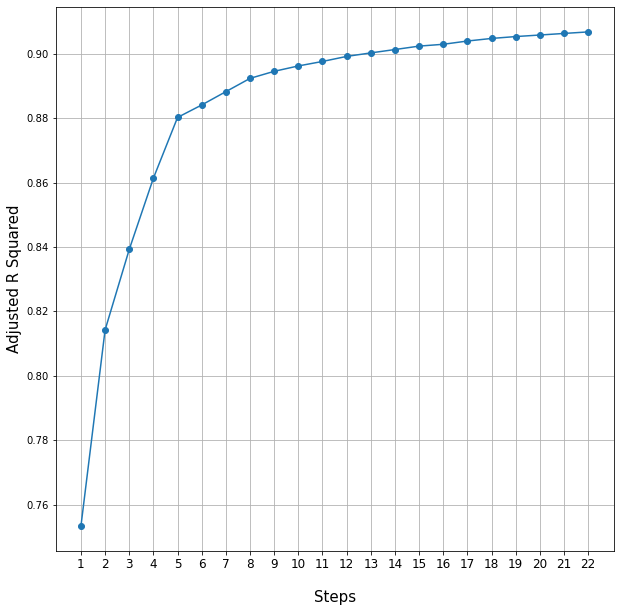

In [213]:
#Step이 진행될수록  Adjusted R-Squared 값이 증가함
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'{s}\n' for s in steps], fontsize=12)
plt.xlabel('Steps',fontsize=font_size)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [214]:
TOYOTA = pd.concat([y,toyota_final[selected_variables]],axis=1)
TOYOTA

,Price,Age_08_04,Automatic_airco,HP,Weight,KM,Powered_Windows,Quarterly_Tax,Fuel_Type[T.Petrol],Boardcomputer,...,Mfg_Month[T.12],Mfg_Month[T.7],Mfg_Month[T.9],Sport_Model,Backseat_Divider,Mfr_Guarantee,Metallic_Rim,Mfg_Month[T.8],Airco,Mfg_Month[T.6]
0,13500.0,23.0,0.0,90.0,1165.0,46986.0,1.0,210.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13750.0,23.0,0.0,90.0,1165.0,72937.0,0.0,210.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,13950.0,24.0,0.0,90.0,1165.0,41711.0,0.0,210.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,14950.0,26.0,0.0,90.0,1165.0,48000.0,0.0,210.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,13750.0,30.0,0.0,90.0,1170.0,38500.0,1.0,210.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9950.0,68.0,0.0,110.0,1050.0,42750.0,0.0,69.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,9950.0,67.0,0.0,110.0,1075.0,42102.0,1.0,85.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
997,9950.0,63.0,0.0,110.0,1114.0,41586.0,0.0,19.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,9900.0,64.0,0.0,110.0,1070.0,41200.0,0.0,85.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
Final = toyota_final[selected_variables]

In [216]:
#최종 선택된 변수들의 VIF 확인결과, 다중공선성 문제가 없음을 확인
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(Final.values, i) for i in range(Final.shape[1])]
vif["features"] = Final.columns
vif

,VIF Factor,features
0,30.341641,Age_08_04
1,1.671391,Automatic_airco
2,79.839539,HP
3,136.691856,Weight
4,9.033202,KM
5,4.405208,Powered_Windows
6,28.830611,Quarterly_Tax
7,42.441707,Fuel_Type[T.Petrol]
8,3.873430,Boardcomputer
9,13.303825,BOVAG_Guarantee


In [217]:
#변수명에 포함된 특수문자 중 에러를 발생시키는 특수문자를 _로 변환
TOYOTA.columns = TOYOTA.columns.str.replace('.','_')
TOYOTA.columns = TOYOTA.columns.str.replace('[','_')
TOYOTA.columns = TOYOTA.columns.str.replace(']','_')
TOYOTA

,Price,Age_08_04,Automatic_airco,HP,Weight,KM,Powered_Windows,Quarterly_Tax,Fuel_Type_T_Petrol_,Boardcomputer,...,Mfg_Month_T_12_,Mfg_Month_T_7_,Mfg_Month_T_9_,Sport_Model,Backseat_Divider,Mfr_Guarantee,Metallic_Rim,Mfg_Month_T_8_,Airco,Mfg_Month_T_6_
0,13500.0,23.0,0.0,90.0,1165.0,46986.0,1.0,210.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,13750.0,23.0,0.0,90.0,1165.0,72937.0,0.0,210.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,13950.0,24.0,0.0,90.0,1165.0,41711.0,0.0,210.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,14950.0,26.0,0.0,90.0,1165.0,48000.0,0.0,210.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,13750.0,30.0,0.0,90.0,1170.0,38500.0,1.0,210.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9950.0,68.0,0.0,110.0,1050.0,42750.0,0.0,69.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
996,9950.0,67.0,0.0,110.0,1075.0,42102.0,1.0,85.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
997,9950.0,63.0,0.0,110.0,1114.0,41586.0,0.0,19.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
998,9900.0,64.0,0.0,110.0,1070.0,41200.0,0.0,85.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
features = 'Age_08_04+Automatic_airco+HP+Weight+KM+Powered_Windows+Quarterly_Tax+Fuel_Type_T_Petrol_+Boardcomputer+BOVAG_Guarantee+Mfg_Month_T_11_+Mfg_Month_T_10_+Mfg_Month_T_12_+Mfg_Month_T_7_+Mfg_Month_T_9_+Sport_Model+Backseat_Divider+Mfr_Guarantee+Metallic_Rim+Mfg_Month_T_8_+Airco+Mfg_Month_T_6_'
features

'Age_08_04+Automatic_airco+HP+Weight+KM+Powered_Windows+Quarterly_Tax+Fuel_Type_T_Petrol_+Boardcomputer+BOVAG_Guarantee+Mfg_Month_T_11_+Mfg_Month_T_10_+Mfg_Month_T_12_+Mfg_Month_T_7_+Mfg_Month_T_9_+Sport_Model+Backseat_Divider+Mfr_Guarantee+Metallic_Rim+Mfg_Month_T_8_+Airco+Mfg_Month_T_6_'

In [220]:
#처음에 독립변수가 42개 사용되었을 때와 비교했을 때 떨어지지 않고 동일한 Adjusted R-Squared 값이 도출됨을 확인
#독립변수를 성공적으로 줄였음을 의미함
reg = ols('Price ~ ' + features, data=TOYOTA).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     442.9
Date:                Thu, 20 May 2021   Prob (F-statistic):               0.00
Time:                        18:07:30   Log-Likelihood:                -8449.9
No. Observations:                1000   AIC:                         1.695e+04
Df Residuals:                     977   BIC:                         1.706e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2074.3297   1252.845      1.656      0.098    -384.246    4532.906
Age_08_04            -132.6809      4.215    -31.481      0.000    -140.952    -124.410
Automatic_airco      1997.5374    170.421     11.721      0.000    1663.105    2331.970
HP                     24.3288      3.170      7.675      0.000      18.108      30.549
Weight                 10.7015      1.108      9.654      0.000       8.526      12.877
KM                     -0.0193      0.002    -12.674      0.000      -0.022      -0.016
Powered_Windows       432.3800     97.307      4.443      0.000     241.425     623.335
Quarterly_Tax          17.1498      1.942      8.832      0.000      13.339      20.960
Fuel_Type_T_Petrol_  1568.0228    276.628      5.668      0.000    1025.169    2110.876
Boardcomputer        -459.2536    111.811     -4.107      0.000    -678.670    -239.837
BOVAG_Guarantee       570.2480    139.911      4.076      0.000     295.687     844.809
Mfg_Month_T_11_      -966.2973    177.438     -5.446      0.000   -1314.501    -618.093
Mfg_Month_T_10_      -766.8601    148.620     -5.160      0.000   -1058.512    -475.208
Mfg_Month_T_12_      -938.5946    190.397     -4.930      0.000   -1312.229    -564.961
Mfg_Month_T_7_       -542.6488    126.870     -4.277      0.000    -791.618    -293.679
Mfg_Month_T_9_       -696.1166    170.396     -4.085      0.000   -1030.502    -361.731
Sport_Model           361.3569     93.127      3.880      0.000     178.606     544.108
Backseat_Divider     -557.8048    128.322     -4.347      0.000    -809.623    -305.986
Mfr_Guarantee         263.9379     78.715      3.353      0.001     109.469     418.407
Metallic_Rim          223.3790     94.743      2.358      0.019      37.456     409.302
Mfg_Month_T_8_       -391.7522    137.977     -2.839      0.005    -662.517    -120.987
Airco                 243.1677     96.634      2.516      0.012      53.533     432.802
Mfg_Month_T_6_       -334.2118    136.603     -2.447      0.015    -602.280     -66.143
==============================================================================
Omnibus:                       92.805   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              587.023
Skew:                           0.012   Prob(JB):                    3.39e-128
Kurtosis:                       6.753   Cond. No.                     2.50e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
#Train Set에 대해 예측값과 실제값 사이의 RMSE를 계산

import math

train_error = list(reg.resid)

train_mse = 0
for i in train_error:
    train_mse += (i**2)
train_mse = train_mse/len(train_error)
train_rmse = math.sqrt(train_mse)

In [236]:
train_rmse

1131.11577143034

In [241]:
#Test Set의 RMSE를 계산하기 위해 Test Set도 동일하게 더미변수화를 진행

features = 'Age_08_04+Mfg_Month+Mfg_Year+KM+Fuel_Type+HP+Met_Color+Automatic+cc+Doors+Gears+Quarterly_Tax+Weight+Mfr_Guarantee+BOVAG_Guarantee+ABS+Airbag_1+Airbag_2+Airco+Automatic_airco+Boardcomputer+CD_Player+Central_Lock+Powered_Windows+Power_Steering+Radio+Mistlamps+Sport_Model+Backseat_Divider+Metallic_Rim+Radio_cassette+Tow_Bar'
y_test, X_test = dmatrices("Price~" + features, data=test, return_type="dataframe")
toyota_dummy_test = pd.concat([y_test,X_test],axis=1)
toyota_dummy_test.columns = toyota_dummy_test.columns.str.replace('.','_')
toyota_dummy_test.columns = toyota_dummy_test.columns.str.replace('[','_')
toyota_dummy_test.columns = toyota_dummy_test.columns.str.replace(']','_')
toyota_dummy_test

,Price,Intercept,Mfg_Month_T_10_,Mfg_Month_T_11_,Mfg_Month_T_12_,Mfg_Month_T_2_,Mfg_Month_T_3_,Mfg_Month_T_4_,Mfg_Month_T_5_,Mfg_Month_T_6_,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1000,8950.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,8950.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1002,8250.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1003,10250.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
1004,8750.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1432,10845.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1433,8500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1434,7250.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [242]:
y_pred = reg.predict(toyota_dummy_test)

In [244]:
reg_test_resid = toyota_dummy_test['Price']-y_pred
reg_test_resid

1000     -74.418760
1001    -274.590455
1002   -1684.518510
1003    -683.854169
1004   -2138.461960
           ...     
1431   -1210.080934
1432    3307.174783
1433    1223.289927
1434    -225.822359
1435   -1532.077542
Length: 436, dtype: float64

In [246]:
#Test Set에 대한 RMSE 계산 결과

import math

test_error = list(reg_test_resid)

test_mse = 0
for i in test_error:
    test_mse += (i**2)
test_mse = test_mse/len(test_error)
test_rmse = math.sqrt(test_mse)

In [247]:
test_rmse

1270.5674767688806

### 결론

#### 실습에 사용한 데이터는 중고차 판매 데이터로, 연속형 변수와 범주형 변수가 혼합된 형태의 데이터이다.

Train Set과 Test Set을 7:3으로 분할하여 사용하였다. Train Set으로 모델을 적합시키는 과정에서 변수 선택 과정을 거쳐야했는데 다중공선성 문제를 1차적으로 해결한 후 남은 데이터에 Stepwise 기법을 적용하여 최종 독립변수를 선택했다. 결과적으로 최초에는 더미변수 처리 후 42개의 독립변수가 존재했던 반면, 변수 선택 후에는 22개의 독립변수만이 남았다.  

추가로, 독립변수가 20개 가량 줄어듦에 따라 수정된 결정계수가 크게 감소하지 않았을지 우려했는데 결과는 굉장히 만족스러웠다. 42개의 독립변수를 모두 사용했을 때와 비교했을 때 22개의 독립변수로도 동일한 수준의 수정된 결정계수 값을 얻을 수 있었다. 차원을 성공적으로 축소시켰음을 알 수 있었다. 최종적으로 계산된 수정된 결정계수는 0.907로 굉장히 높은 수치가 도출되었다.

마지막으로 Train Set과 Test Set에 대해 RMSE를 계산하였는데 Train Set에서 약 1131, Test Set에서 약 1270으로 큰 차이가 나지 않았다. 이를 통해 본 실습에서 생성된 회귀분석 모델이 과적합을 성공적으로 피했음을 알 수 있었다.